# EDA

In [188]:
# importa bibliotecas de data vis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from xgboost import XGBClassifier as XGB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_auc_score, accuracy_score , balanced_accuracy_score , average_precision_score, recall_score ,precision_score , make_scorer
from  sklearn.model_selection import cross_validate 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [220]:
#importamos os dados
dados = pd.read_csv('https://raw.githubusercontent.com/Gabrieldpll/Hotel-Reservations/main/Hotel%20Reservations.csv')

In [221]:
# Verificamos como é o data set
dados.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [197]:
# Verifica se os dados não estão ordenados ( se estivessem é preciso embaralhar)
print((np.diff(dados['arrival_year']) >= 0).all())

False


In [198]:
# Verifica se há valores nulos ou se há inconsistência no tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [222]:
# Objetos estavam codificados errados
dados['required_car_parking_space'] = dados['required_car_parking_space'].astype('object') 
dados['repeated_guest'] = dados['repeated_guest'].astype('object') 


In [223]:
# Dropa index 
dados.drop(['Booking_ID'],axis = 1 , inplace = True)

In [203]:
dados.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [228]:
# verificar correlação entre variaveis númericas
dados_cor = dados[['no_of_adults' , 'no_of_children' , 'no_of_weekend_nights','no_of_week_nights','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]

dados_cor.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.030080,-0.049344,0.022753,0.045994
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,1.000000,0.468147,-0.063340,-0.003317
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,0.468147,1.000000,-0.113684,0.027377
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.063340,-0.113684,1.000000,0.184381
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,-0.003317,0.027377,0.184381,1.000000


Usando a tabela abaixo nota-se que em geral as variáveis 

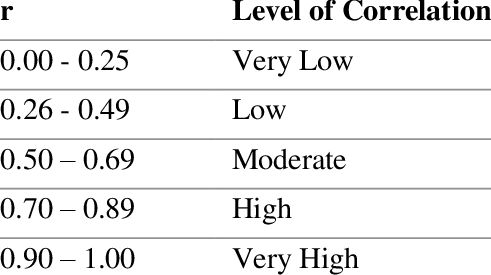

In [ ]:
#distribuicao das claseses
# 
sns.countplot(data = dados , x = 'booking_status')

Há desbalanceamento entre as clases

In [235]:
dados.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

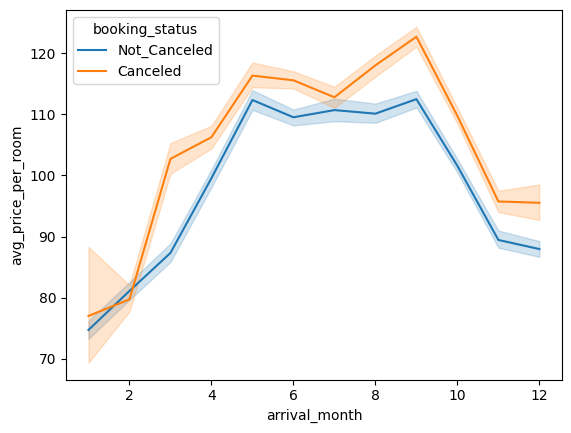

In [242]:
sns.lineplot(x="arrival_month", y="avg_price_per_room",  hue = "booking_status",data= dados)

<Axes: xlabel='arrival_month', ylabel='lead_time'>

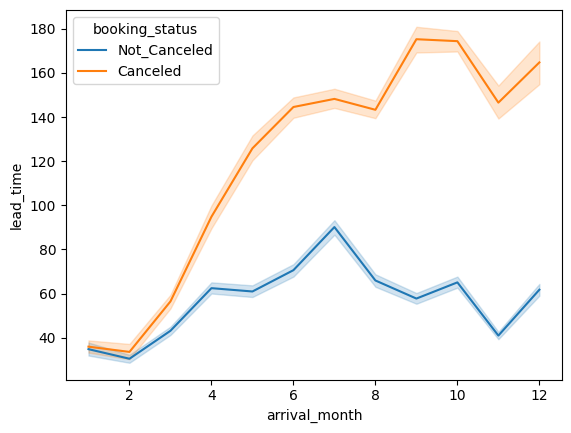

In [248]:
sns.lineplot(x="arrival_month", y="lead_time", hue = 'booking_status', data= dados)


<Axes: xlabel='arrival_month', ylabel='no_of_special_requests'>

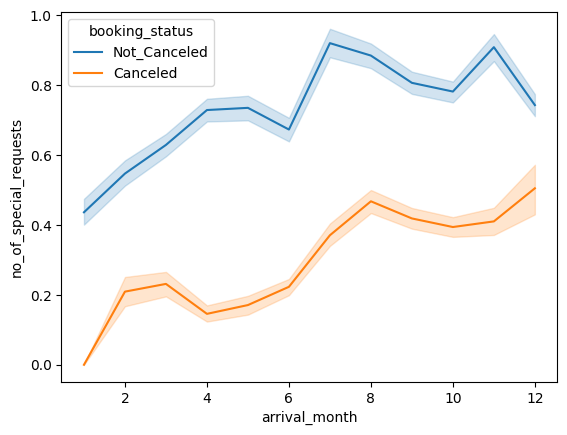

In [249]:
sns.lineplot(x="arrival_month", y="no_of_special_requests",hue = 'booking_status',data= dados)


* os preços ficam maiores no entre o mes 4 e 10
* o tempo de espera é maior no segundo semestre
* tempo de espera maior está relacionado a maior cancelamento 
* o número de pedidos especias ( quarto em andar mais alto, vista melhhor etc) com mais frequência no segundo semestre



<Axes: xlabel='booking_status', ylabel='lead_time'>

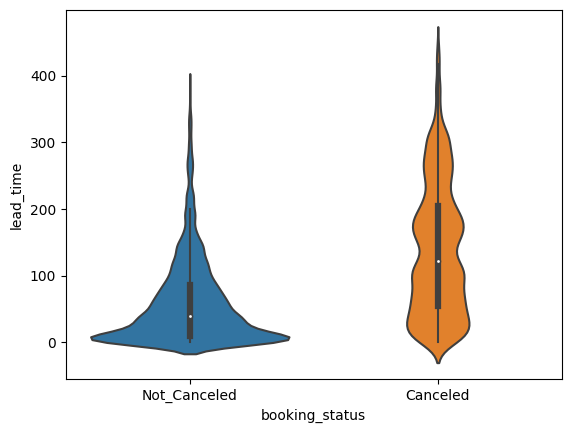

In [253]:
#
sns.violinplot(y = 'lead_time' , x = 'booking_status' ,data = dados)

A distribuição do tempo de espera dado que o a reserva foi cancela é muito diferente da distriuição do tempo de espera dado que o tempo não foi cancelado

In [254]:
dados.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

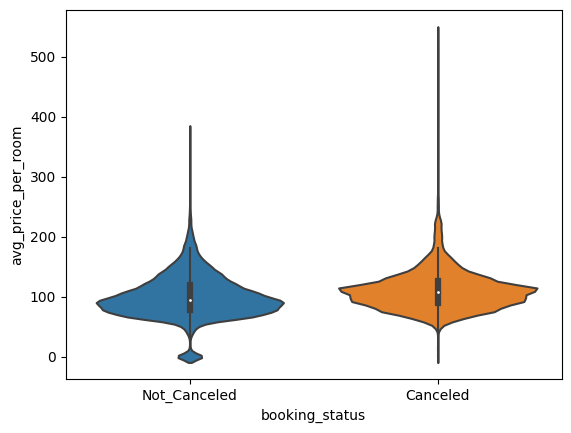

In [265]:
sns.violinplot(y = 'avg_price_per_room' , x = 'booking_status' ,data = dados)

Distribuições estão parecidas , mas o preço medio dado reserva cancelada parece ter caudas maiores

In [267]:
dados.groupby('booking_status').describe()['avg_price_per_room']

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
Canceled,11885.0,110.589966,32.264394,0.0,89.27,108.0,126.36,540.0
Not_Canceled,24390.0,99.931412,35.872154,0.0,77.86,95.0,119.10,375.5


a estatística de maximo é diferente e os quantis também. note que a distribuição dos cancelados tem uma 'ponta do violino' maior e 

<Axes: xlabel='booking_status', ylabel='count'>

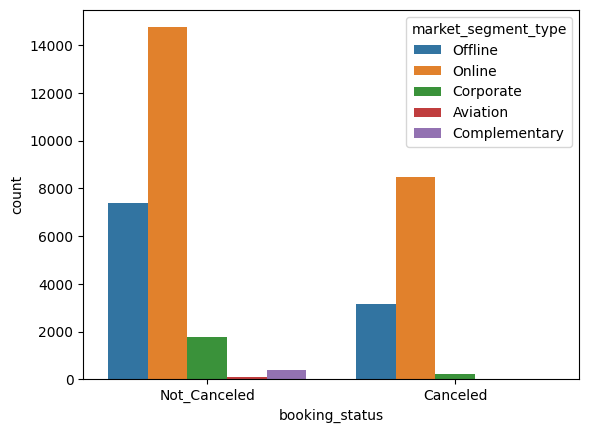

In [275]:
sns.countplot(hue = 'market_segment_type' , x  = 'booking_status' ,data = dados)

In [289]:
pd.crosstab(dados['booking_status'] , dados['market_segment_type'],margins = True, normalize = 'index')


market_segment_type,Aviation,Complementary,Corporate,Offline,Online
booking_status,,,,,
Canceled,0.003113,0.000000,0.018511,0.265292,0.713084
Not_Canceled,0.003608,0.016031,0.073678,0.302378,0.604305
All,0.003446,0.010779,0.055603,0.290227,0.639945


note que 71% das reservas canceladas foram feitas online  e as reservas feita por 'corporate' são tem poucos cancelamentos .

notemos que há muitas categorias poucos frequentes. Em especial não há exemplos de cancelados do tipo complementary . Isso pode ser um problema para alguns modelos como regressao logistica

<Axes: xlabel='booking_status', ylabel='count'>

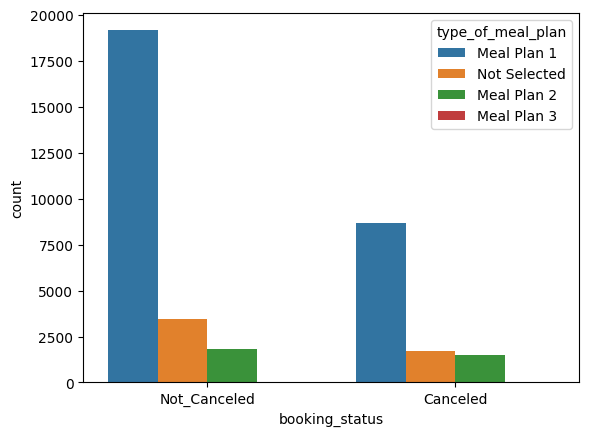

In [277]:
sns.countplot(hue = 'type_of_meal_plan' , x  = 'booking_status' ,data = dados)

In [287]:
pd.crosstab(dados['booking_status'] , dados['type_of_meal_plan'],margins = True, normalize = 'index')

type_of_meal_plan,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
booking_status,,,,
Canceled,0.730248,0.126714,0.000084,0.142953
Not_Canceled,0.785404,0.073760,0.000164,0.140672
All,0.767333,0.091110,0.000138,0.141420


note que o tipo de alimnetação 3 quase não é escolhido e o plano 2 é mais escolhido por aqueles que cancelam

In [288]:
pd.crosstab(dados['booking_status'] , dados['no_of_adults'],margins = True, normalize = 'index')


no_of_adults,0,1,2,3,4
booking_status,,,,,
Canceled,0.003702,0.156163,0.767270,0.072613,0.000252
Not_Canceled,0.003895,0.239401,0.696556,0.059615,0.000533
All,0.003832,0.212130,0.719724,0.063873,0.000441


há poucas obersvações com mais de 4 adultos e há mais cancelamento para somente 1 adulto

In [290]:
dados.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [291]:
pd.crosstab(dados['booking_status'] , dados['room_type_reserved'],margins = True, normalize = 'index')

room_type_reserved,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
booking_status,,,,,,,
Canceled,0.763315,0.019184,0.000168,0.174085,0.006058,0.034161,0.003029
Not_Canceled,0.781386,0.019024,0.000205,0.163510,0.007913,0.022960,0.005002
All,0.775465,0.019076,0.000193,0.166975,0.007305,0.026630,0.004356


em geral as proporções são parecidas , mas há muito classes infrequentes

# Processamento de dados

In [180]:
# Arrival_year , arrival_month e arrival_data, a priori, serão descartadas, (Não vamos modelar variáveis temporais)
# Futuramente iremos propor uma maneira de abordar esse problema
dados.drop(['arrival_year','arrival_month','arrival_date'],axis = 1,inplace = True)


In [181]:
# vejamos o que mudou
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   market_segment_type                   36275 non-null  object 
 9   repeated_guest                        36275 non-null  object 
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [182]:


# Primeiro passo selecionar as colunas que vão ser transformadas pelo one hot enconding
categoricas = dados.loc[: , ['required_car_parking_space','repeated_guest','type_of_meal_plan','room_type_reserved','market_segment_type']]
enconding = OneHotEncoder(drop = 'if_binary', sparse_output = False)

categoricas = enconding.fit_transform(categoricas)

# Segundo passo: criar e juntar os datas frames

categorical_df = pd.DataFrame(categoricas,columns = enconding.get_feature_names_out())
numerical_df = dados.drop(['required_car_parking_space','repeated_guest','type_of_meal_plan','room_type_reserved','market_segment_type'],axis = 1)

pre_process_df = pd.concat([categorical_df, numerical_df], axis=1)

# Terceiro passo : Verificar os dados 
pre_process_df['booking_status'] = dados['booking_status'].map({'Canceled' : 1 ,'Not_Canceled' : 0})
pre_process_df.head(5)

,required_car_parking_space_1,repeated_guest_1,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,...,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,0,1,2,224,0,0,65.00,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,0,2,3,5,0,0,106.68,1,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,2,1,1,0,0,60.00,0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,0,0,2,211,0,0,100.00,0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,0,1,1,48,0,0,94.50,0,1


# Contrução de uma baseline

Nesse tapa serão aplicados os métodos de aprendizado supervisionado  mais populares, com hyperparâmetros padrão. O objetivo desssa etapa é fornecer resultados que servirão como base de comparação para propostas futuras. Nota que o objetivo aqui é gerar um **relatório automático que deve ser usado como base**

In [122]:
# Vamos utilizar o knn que depende da distância e a regressão logística que na configuração usual minimiza uma função com norma 2 , por isso vamos  normalizar os dados
from sklearn.preprocessing import StandardScaler


X = pre_process_df.drop('booking_status',axis = 1)
y = pre_process_df['booking_status']



In [34]:

# Definimos as métricas de interesse 
metricas = { 
            
            'balanced_acc' : 'balanced_accuracy',
            'recall' :  'recall',
            'precision' :  'precision',
             'average_precision' : 'average_precision'}

#Sensitivity and specificity

# Criamos um dicionário para armazenar os resultados dos modelos
dicionario = {}


# Uma função para armazenar os resultados no diconário
def get_metric_to_df(score,nome_do_modelo):
    dicionario[nome_do_modelo] = {
                               
                                'balaneced_acc' : f"{round(score['test_balanced_acc'].mean(),4)} +/- {round(score['test_balanced_acc'].std(),4)}" ,
                                 'recall' :  f"{round(score['test_recall'].mean(),4)} +/- {round(score['test_recall'].std(),4)}",
                                  'precision' : f"{round(score['test_precision'].mean(),4)} +/- {round(score['test_precision'].std(),4)}",
                                  'average_precision' : f"{round(score['test_average_precision'].mean(),4)} +/- {round(score['test_average_precision'].std(),4)}"
                                   }
    

from sklearn.metrics import  roc_auc_score, accuracy_score , balanced_accuracy_score , recall_score ,precision_score , make_scorer


def custom_classification_report(y_test,y_pred):
    auc = round(roc_auc_score(y_test,y_pred),4)
    balanced_acc = round(balanced_accuracy_score(y_test,y_pred),4)
    recall = round(recall_score(y_test,y_pred),4)
    precision =  round(precision_score(y_test,y_pred),4)
    return {'auc' : auc , 'balanced_acc' : balanced_acc , 'recall' : recall, 'precision' : precision}



In [35]:


# define os mpdeçps a serem testados
modelos = [KNeighborsClassifier( ),GaussianNB(),LogisticRegression(random_state = 42),SVC(random_state = 42),tree.DecisionTreeClassifier(),RandomForestClassifier(random_state = 42),BaggingClassifier(random_state = 42 ),AdaBoostClassifier(random_state = 42)]




# para cada modelo realize um 5-fold cross validation
for modelo in modelos:
    pipe = Pipeline([('scale' , StandardScaler()),
                     ('mod',modelo)])
    scores = cross_validate(pipe, X, y, cv=5,scoring = metricas)
    get_metric_to_df(scores,modelo.__class__.__name__)




In [36]:
pd.DataFrame.from_dict(dicionario).T


,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022


#Árvore de decisão

Pré processamento de dados para árvore de decisão : Não é necessário normalizar os dados, já que nem o gini e nem a entropia são afetados pela distância e, **devido a implementação do sklearn**, é preciso realizar enconding das variáveis categóricas, embora isso não seja necessário para proposta do algoritmo ( por exemplo ,[implementação do spark](https://spark.apache.org/docs/latest/mllib-decision-tree.html)  permite trabalhar com variáveis categóricas )

In [40]:
print(dicionario['DecisionTreeClassifier'])

{'balaneced_acc': '0.8374 +/- 0.0116', 'recall': '0.7806 +/- 0.0204', 'precision': '0.7822 +/- 0.0101', 'average_precision': '0.692 +/- 0.0162'}


Note que somente com os hyperparametros padrões já obtemos bons resultados , agora vamos verificar se é possível melhorar o resultado tunando esses hyperparametros


In [108]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe , space_eval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [42]:
# define o espaço de hyperparâmetros que queremos otimizar
#https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

space = {
    "max_depth": hp.randint("max_depth", 1, 8),
    "min_samples_split": hp.randint("min_samples_split", 2, 40),
    "min_samples_leaf": hp.randint("min_samples_leaf", 2, 20),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "class_weight" : hp.choice("class_weight", [None, "balanced"]),
    "max_features" : hp.choice("max_features", [None, "sqrt", "log2"])
}

In [43]:
def hyperparameter_tuning(params):
    dct = tree.DecisionTreeClassifier(**params)
    score = cross_val_score(dct, X_train, y_train,scoring="average_precision").mean()
    return {"loss": -score, "status": STATUS_OK}

In [44]:
trials = Trials()
best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=300, 
    trials=trials,
    rstate = np.random.default_rng(seed=42)
)


100%|██████████| 300/300 [01:07<00:00,  4.42trial/s, best loss: -0.8335786735813114]


In [45]:
melhores_atributos  = space_eval(space,best)
melhores_atributos

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 16,
 'min_samples_split': 38}

In [46]:
dct_tuning  = tree.DecisionTreeClassifier(class_weight= None , criterion = 'gini', max_depth = 7 , max_features = None, min_samples_leaf = 16 ,min_samples_split = 39 )


In [47]:
scores_dct = cross_validate(dct_tuning, X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_dct, 'DCT + Hyperopt')

In [48]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073


In [49]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073


Note que houve um aumento considerável na precisão, ou seja, a seleção de modelos cumpriu com seu papel, isso é selecionou hyperparâmetros que levam a melhoria da métrica de interesse.

Balanceamento artificial da base de treino
Obs : como vamos utilizar ADASYN é necessário utilizar os dados normalizados


In [50]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE


In [51]:
def hyperparameter_tuning_dsc_smote(params):
    pipe = imbpipe([('scale' , StandardScaler()),
                  ('SMOTE' , SMOTE(random_state = 42)) ,
                  ('dct',tree.DecisionTreeClassifier(**params) )])
    balanced_acc = cross_val_score(pipe, X_train, y_train,scoring="average_precision").mean()
    return {"loss": -balanced_acc, "status": STATUS_OK}

In [52]:
trials = Trials()
best_dct_dsc_smote = fmin(
    fn=hyperparameter_tuning_dsc_smote,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials,
    rstate = np.random.default_rng(seed=42)
    
)


100%|██████████| 100/100 [03:02<00:00,  1.82s/trial, best loss: -0.8317318804369298]


In [53]:
space_eval(best_dct_dsc_smote,'dct')

{'class_weight': 1,
 'criterion': 0,
 'max_depth': 7,
 'max_features': 0,
 'min_samples_leaf': 9,
 'min_samples_split': 16}

In [54]:
pipe_otimizado_smote =  imbpipe([('scale' , StandardScaler()),
                  ('SMOTE' , SMOTE(random_state = 42)) ,
                  ('dct',tree.DecisionTreeClassifier(max_depth =  7 , min_samples_leaf = 9 , min_samples_split = 29 , class_weight = None, criterion  = 'gini' , max_features = None) )])

In [55]:
scores_dct_smote = cross_validate(pipe_otimizado_smote, X, y, cv=5,scoring = metricas)

In [56]:
get_metric_to_df(scores_dct_smote, 'DCT + SMOTE + Hyperopt')

In [57]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073
DCT + SMOTE + Hyperopt,0.8264 +/- 0.0057,0.7738 +/- 0.0063,0.7571 +/- 0.0111,0.832 +/- 0.0106


In [58]:
pipe_otimizado_smote.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('SMOTE', SMOTE(random_state=42)),
                ('dct',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=9,
                                        min_samples_split=29))])

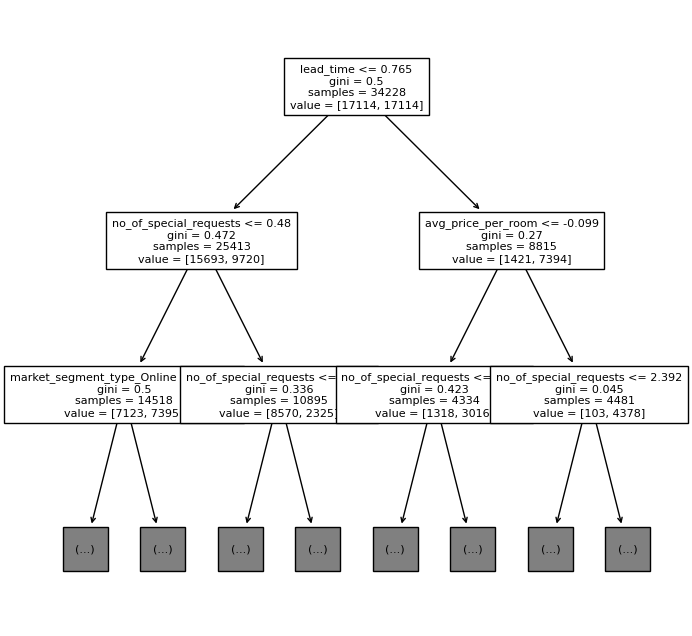

In [59]:
# foi citado no trabalho que haveria um plot da árvore de decisão, eis o plot :
from sklearn.tree import plot_tree
arvore = pipe_otimizado_smote['dct']
nomes = pipe_otimizado_smote['scale'].get_feature_names_out()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plot_tree(arvore,feature_names = nomes, max_depth = 2, fontsize=8)
plt.show()

In [60]:
from sklearn.inspection import permutation_importance


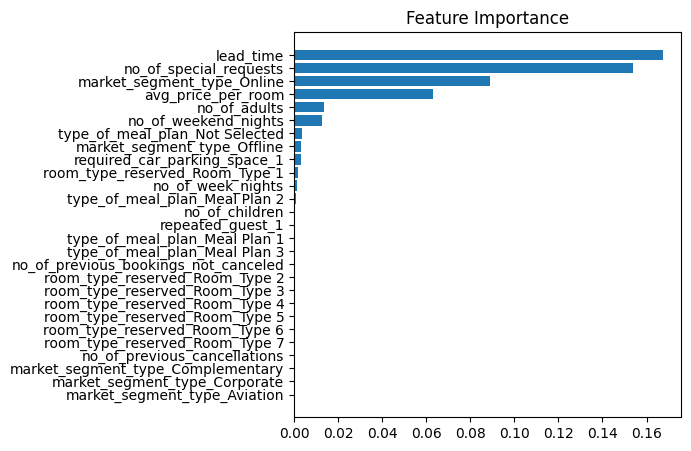

In [61]:
#https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-from-scikit-learn


feature_importance_dct = permutation_importance(pipe_otimizado_smote,X_test,y_test , random_state = 42)
feature_importance = feature_importance_dct['importances_mean'] 
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(5, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


plt.show()

#XGBOOST  / Random florest

In [123]:
# aplica o método XGB
from xgboost import XGBClassifier as XGB
scores_xgboost = cross_validate(XGB(random_state = 42, tree_method = 'hist'  ), X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost, 'xgboost')

In [63]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073
DCT + SMOTE + Hyperopt,0.8264 +/- 0.0057,0.7738 +/- 0.0063,0.7571 +/- 0.0111,0.832 +/- 0.0106


O XGBoost tem um hyperparâmetro que pode ser utilizado para  data sets desbalanceados é o scale pos weight que controla o balanço entre as classes , sendo que a  recomendação é usá-lo como a razão entre a quantidade exemplos da classe negativa e a quantidade de exemplos da classe positiva. A seguir vamos verificar como ele impacta no desempenho de algumas métricas do nosso modelo



In [124]:
# Calcula as métricas para diferentes valores do hyperparâmetro scale_pos_weight
scale_pos_weight = []
recall = []
precision = []
avarage_precison = []
for i in np.linspace(0.1,10,50):
    xgb = XGB(random_state = 42 ,scale_pos_weight = i,tree_method  = 'hist')
    scores_xgboost = cross_validate( xgb , X, y, cv=5,scoring = metricas)
    a = scores_xgboost['test_average_precision'].mean()
    p = scores_xgboost['test_precision'].mean()
    r = scores_xgboost['test_recall'].mean()
    scale_pos_weight.append(i)
    recall.append(r)
    precision.append(p)
    avarage_precison.append(a)


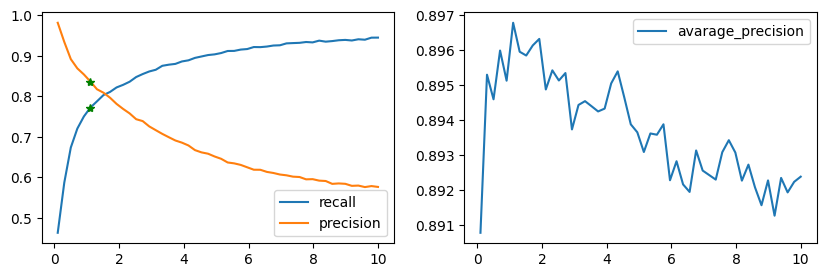

In [65]:
# armazena o indice do  scale_pos_weight que obteve maior avarage_precison.
index_max = avarage_precison.index(max(avarage_precison))

import matplotlib.pyplot as plt
figure, axis = plt.subplots(1, 2,figsize=(10,3))

axis[0].plot(scale_pos_weight,recall,label = "recall")
axis[0].plot(scale_pos_weight,precision, label = "precision")
axis[0].plot(scale_pos_weight[index_max], precision[index_max], 'g*')
axis[0].plot(scale_pos_weight[index_max], recall[index_max], 'g*')

axis[0].legend()

axis[1].plot(scale_pos_weight,avarage_precison, label  = "avarage_precision")
axis[1].legend()

plt.show()

In [125]:
# Printa scale_pos_weight que maximiza avarage_precision
print(scale_pos_weight[index_max])

1.1102040816326533


Os gráficos indicam que esse parâmetro pode ser útil para controlar a relação Precision-Racall 

In [126]:
XGB_tuned = XGB(
                random_state = 42,
                scale_pos_weight = 1.1102040816326533,
                tree_method  = 'hist'   
                )
scores_xgboost_tuned = cross_validate( XGB_tuned , X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost_tuned, 'xgboost + scale_pos_weight')

In [67]:
pipe_ref_Xgboost =  imbpipe([('scale' , StandardScaler()),
                  ('SMOTE' , SMOTE(random_state = 42)) ,
                  ('xgb',XGB(random_state = 42))])

scores_rf_smote = cross_validate( pipe_ref_Xgboost , X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_rf_smote, 'XGB + SMOTE')

In [68]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073
DCT + SMOTE + Hyperopt,0.8264 +/- 0.0057,0.7738 +/- 0.0063,0.7571 +/- 0.0111,0.832 +/- 0.0106


Text(0.5, 1.0, 'Feature Importance XGBOOST')

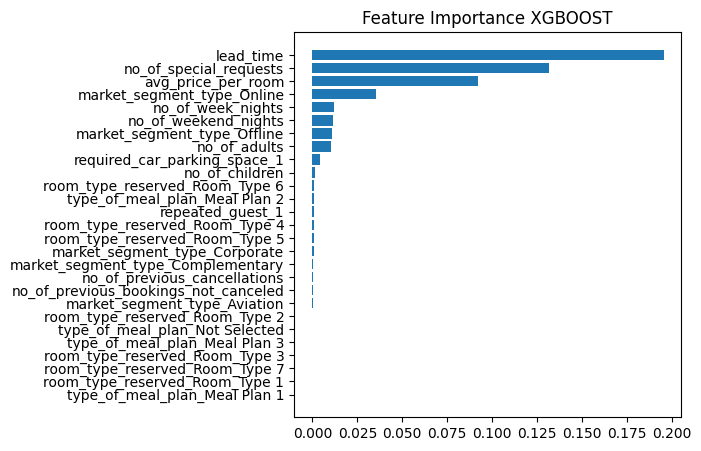

In [127]:
XGB_tuned.fit(X_train,y_train)
feature_importance_dct = permutation_importance(XGB_tuned,X_test,y_test , random_state = 42)
feature_importance = feature_importance_dct['importances_mean'] 
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(5, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance XGBOOST')

Randon florest

In [69]:
# O random florest performou bem , mesmo com o desbalanceamento das classes.
# Há algumas adaptações que podemos fazer para tentar melhorar o random florest, uma delas é balancear os dados artificialmente antes de aplicar o método

pipe_ref_smote =  imbpipe([('scale' , StandardScaler()),
                  ('SMOTE' , SMOTE(random_state = 42)) ,
                  ('rf',RandomForestClassifier())])

scores_rf_smote = cross_validate( pipe_ref_smote , X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_rf_smote, 'RF + SMOTE')

In [70]:

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [71]:
from imblearn.ensemble import BalancedRandomForestClassifier
balanced_rf = BalancedRandomForestClassifier(n_estimators = 200, n_jobs = -1)


In [72]:

scores_rus = cross_validate( balanced_rf , X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_rus, 'balanced_rf')

Text(0.5, 1.0, 'Feature Importance Smote + rf')

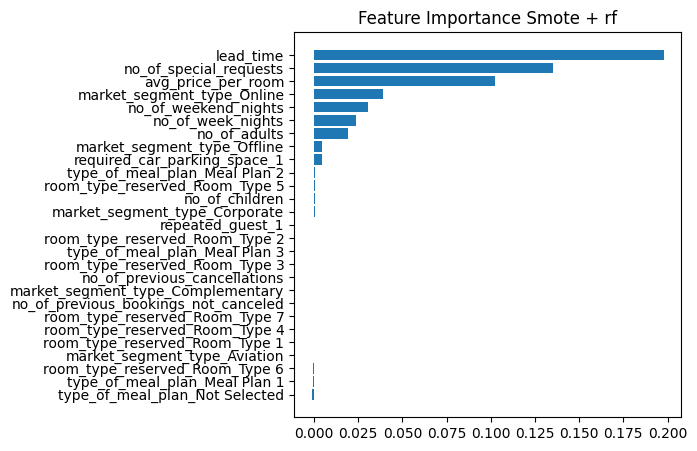

In [111]:
pipe_ref_smote.fit(X_train,y_train)
feature_importance_dct = permutation_importance(pipe_ref_smote,X_test,y_test , random_state = 42)
feature_importance = feature_importance_dct['importances_mean'] 
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(5, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Smote + rf')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delay

Text(0.5, 1.0, 'Feature Importance Balanced rf ')

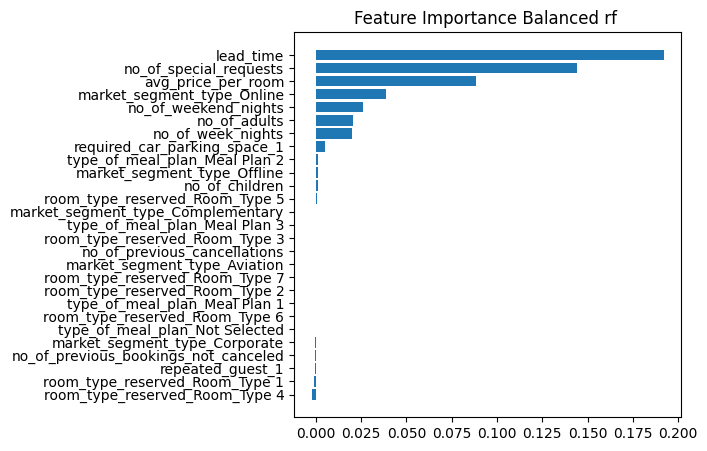

In [110]:
balanced_rf.fit(X_train,y_train)
feature_importance_dct = permutation_importance(balanced_rf,X_test,y_test , random_state = 42)
feature_importance = feature_importance_dct['importances_mean'] 
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(5, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Balanced rf ')

In [ ]:
pd.DataFrame.from_dict(dicionario).T

# Engenharia  de atributos

Como dito anteriormente , nos descartamos os atributos relacionados com o tempo, pois incluir esses atributos implicaria que teriamos que adaptar os modelos de aprendizado supervisionado para que eles sejam capazes de aprender com base em uma estrutura temporal. Como as predições já foram satisfatórias, não há necessidade de partir para modelagens mais complexas ( haveria se fosse explicitamente requerido), em vez disso nos iremos criar uma nova categoria com base no tempo. 

In [153]:
df_engenharia = pd.read_csv('https://raw.githubusercontent.com/Gabrieldpll/Hotel-Reservations/main/Hotel%20Reservations.csv')

In [154]:
df_engenharia.drop(['Booking_ID'],axis = 1 , inplace = True)

In [155]:
df_engenharia.drop(['arrival_year','arrival_date'],axis = 1,inplace = True)

In [156]:
def transforma_trimeste(x):
  if x in [1,2,3]:
    return 'primeiro_trimeste'
  elif x in [4,5,6]:
    return 'segundo_semetre'
  elif x in [7,8,9]:
    return 'terceiro_trimestre'
  elif x in [10,11,12]:
    return 'quarto_trimestre'
df_engenharia['tempo'] = df_engenharia['arrival_month'].map(transforma_trimeste)

In [157]:
df_engenharia['tempo'] = df_engenharia['arrival_month'].map(transforma_trimeste)

In [158]:
df_engenharia.drop('arrival_month',axis = 1,inplace = True)

In [134]:
df_engenharia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   market_segment_type                   36275 non-null  object 
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [135]:
#df_engenharia['required_car_parking_space'] = df_engenharia['required_car_parking_space'].astype('object') 
#df_engenharia['repeated_guest'] = df_engenharia['repeated_guest'].astype('object') 
#df_engenharia['booking_status'] = df_engenharia['booking_status'].astype('object') 

In [159]:
df_engenharia['booking_status'] = df_engenharia['booking_status'].map({'Canceled' : 1 ,'Not_Canceled' : 0})
y = df_engenharia['booking_status']
X = df_engenharia.drop('booking_status',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [160]:
 # primeiro faramos a normalização semelhante ao de regressão logística, mas sem remover colunas


cat = ['type_of_meal_plan','required_car_parking_space','room_type_reserved', 'market_segment_type','repeated_guest','tempo']
numerical = [i for i in X_train.columns if i not in cat]
t = [('num', StandardScaler(), numerical),
    ('cat',OneHotEncoder( sparse_output = False , min_frequency = 0.1, handle_unknown = 'ignore' ),cat)]
col_transform = ColumnTransformer(transformers=t)


In [138]:
col_transform = ColumnTransformer(transformers=t)

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier as XGB
univarite_selector = SelectPercentile( score_func = mutual_info_classif)
feat_selector = RFE(estimator = RandomForestClassifier())

In [140]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', col_transform),
                # ('feature_selection_01',univarite_selector),
                 #('poly', PolynomialFeatures(2)),
                 #('feture_seleciton_2',feat_selector),
                 ('rf',BalancedRandomForestClassifier(random_state = 42))
                 ])

In [141]:
pipe

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.1,
                                                                sparse_output=False),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'market_segment_type',
                                                   'repeated_guest',
                                                   'tempo'])])),
                ('rf', BalancedRandomForestClassifier(random_state=42))])

In [142]:
scores_xgboost_fe_sf = cross_validate(pipe, X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost_fe_sf, 'Balanced Rf +  fe')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delay

In [143]:
pipe_rf_fe_poly = Pipeline([('scale', col_transform),               
                 ('poly', PolynomialFeatures(2)),    
                 ('rf',BalancedRandomForestClassifier(random_state = 42))
                 ])
scores_xgboost_fe_sf = cross_validate(pipe_rf_fe_poly, X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost_fe_sf, 'balanced_rf +  fe + poly')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delay

In [144]:
scores_xgboost_fe_sf = cross_validate(pipe, X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost_fe_sf, 'Balanced Rf +  fe')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delay

In [145]:
pipe_XGB = Pipeline([('scale', col_transform),
                # ('feature_selection_01',univarite_selector),
                 #('poly', PolynomialFeatures(2)),
                 #('feture_seleciton_2',feat_selector),
                 ('xgb',XGB(random_state = 42,tree_method  = 'hist' ))
                 ])
scores_xgboost_fe_sf = cross_validate(pipe_XGB, X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost_fe_sf, 'XGboost +  fe')

In [146]:
pipe_XGB_rf = Pipeline([('scale', col_transform),               
                 ('poly', PolynomialFeatures(2)),                 
                 ('xgb',XGB(random_state = 42,tree_method  = 'hist' ))
                 ])
scores_xgboost_fe_sf = cross_validate(pipe_XGB_rf, X, y, cv=5,scoring = metricas)
get_metric_to_df(scores_xgboost_fe_sf, 'XGboost +  fe + poly')

In [147]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073
DCT + SMOTE + Hyperopt,0.8264 +/- 0.0057,0.7738 +/- 0.0063,0.7571 +/- 0.0111,0.832 +/- 0.0106


Text(0.5, 1.0, 'Feature Importance Xgboost + fe')

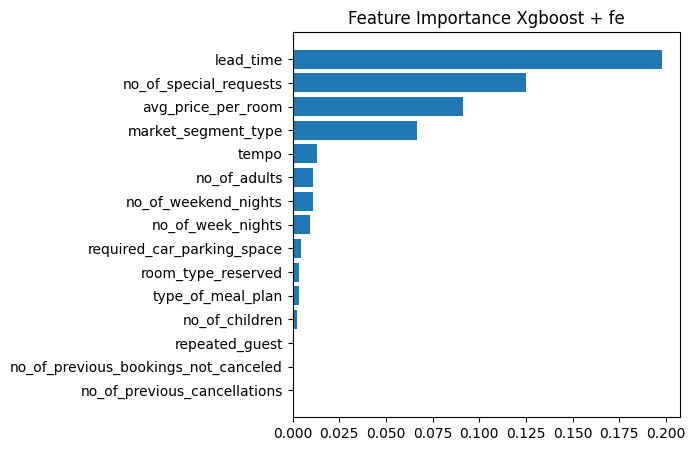

In [161]:
# grafico de feature importance xgb
pipe_XGB.fit(X_train,y_train)
feature_importance_dct = permutation_importance(pipe_XGB,X_test,y_test , random_state = 42)
feature_importance = feature_importance_dct['importances_mean'] 
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(5, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Xgboost + fe')

Junção de classificadors

In [148]:
from sklearn.ensemble import VotingClassifier


vote = VotingClassifier([('xgb', XGB(random_state = 42,tree_method  = 'hist')),
                          ('balanced_rf',BalancedRandomForestClassifier(random_state = 42)),
                          ('rf',RandomForestClassifier(random_state = 42)),
                          ('xgb-balanced',XGB(random_state = 42,tree_method  = 'hist', scale_pos_weight  = 1.14))],
                        voting = 'soft')




pipe_voting = Pipeline([('scale', col_transform),
                        ('poly', PolynomialFeatures(2)),
                        ('voting' , vote)])

                # ('feature_selection_01',univarite_selector),
                #('poly', PolynomialFeatures(2)),
                 #('feture_seleciton_2',feat_selector),
                 

score_vote = cross_validate(pipe_voting, X, y, cv=5,scoring = metricas)
get_metric_to_df(score_vote, 'pipe_voting')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delay

In [149]:
pd.DataFrame.from_dict(dicionario).T

,balaneced_acc,recall,precision,average_precision
KNeighborsClassifier,0.8156 +/- 0.0109,0.7244 +/- 0.0223,0.791 +/- 0.0077,0.804 +/- 0.0141
GaussianNB,0.5447 +/- 0.007,0.9707 +/- 0.0106,0.3493 +/- 0.0038,0.6045 +/- 0.0093
LogisticRegression,0.7513 +/- 0.0179,0.6091 +/- 0.0361,0.7355 +/- 0.012,0.7546 +/- 0.0276
SVC,0.7668 +/- 0.0159,0.6042 +/- 0.034,0.8064 +/- 0.011,0.8047 +/- 0.0158
DecisionTreeClassifier,0.8374 +/- 0.0116,0.7806 +/- 0.0204,0.7822 +/- 0.0101,0.692 +/- 0.0162
RandomForestClassifier,0.8587 +/- 0.0048,0.7819 +/- 0.0081,0.8552 +/- 0.0056,0.9094 +/- 0.006
BaggingClassifier,0.8498 +/- 0.0062,0.7683 +/- 0.0124,0.8451 +/- 0.004,0.8753 +/- 0.0086
AdaBoostClassifier,0.7734 +/- 0.0119,0.6569 +/- 0.0249,0.744 +/- 0.009,0.7891 +/- 0.022
DCT + Hyperopt,0.8045 +/- 0.0095,0.6971 +/- 0.0283,0.7949 +/- 0.0128,0.8344 +/- 0.0073
DCT + SMOTE + Hyperopt,0.8264 +/- 0.0057,0.7738 +/- 0.0063,0.7571 +/- 0.0111,0.832 +/- 0.0106


## Modelo Não interpretável Balanced randon Florest